In [2]:
from tensorflow.keras.saving import load_model  # pylint: disable=E0401
from PIL import Image
import numpy as np
from pathlib import Path

model = load_model("../models/final_model.model")

2024-05-25 21:57:18.491320: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-25 21:57:19.920333: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


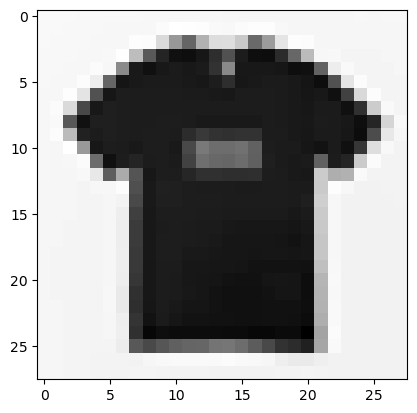

In [12]:
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

image = Image.open("../images/tshirt.jpeg")

bw_image = ImageOps.invert(image.convert("L"))
resized_image = bw_image.resize((28, 28))

img_array = np.array(resized_image)
img_array = img_array.reshape((1, 28, 28, 1))
img_array = img_array / 255

plt.imshow(img_array[0], cmap=plt.cm.binary)
plt.show()

In [13]:
class_names = [
    "T_shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

predict_prob = model.predict(img_array)
prediction = class_names[np.argmax(predict_prob)]
confidence = np.max(predict_prob)

1/1 [==============================] - 0s 16ms/step


In [14]:
prediction

'T_shirt/top'

In [15]:
confidence

0.98046

In [4]:
from preprocessing import get_train_test_sets

_, _, x_test, _, _, y_test = get_train_test_sets()

In [7]:
x_test

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.01568628],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.00392157],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

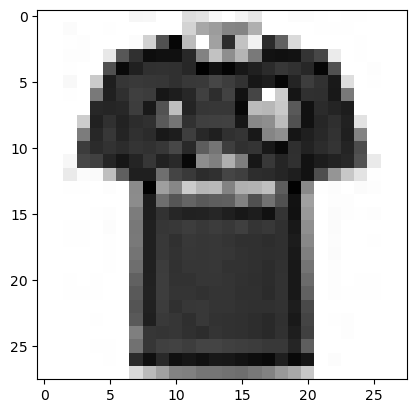

In [6]:
x_test[0].shape
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

'Pullover'